### Introduction

This project focuses on applying deep learning techniques to the classification of bird species from images. Utilizing the "BIRDS 20 SPECIES- IMAGE CLASSIFICATION" dataset from Kaggle, our objective is to distinguish between 20 different bird species, leveraging the visual details captured in high-quality images. This endeavor not only showcases the power of deep learning in interpreting complex visual information but also contributes to biological research and conservation efforts by enhancing our ability to automatically identify species.

The significance of this project extends beyond the technical achievement of developing an accurate classification model. By accurately identifying bird species from images, we can support ecological studies, biodiversity monitoring, and the creation of educational resources. This work sits at the intersection of technology and conservation, demonstrating how advancements in machine learning can aid in understanding and preserving our natural world.

The dataset comprises 3208 training images, and 200 additional images split evenly between testing and validation sets, covering 20 bird species. Each image focuses on a single bird, ensuring that the subject occupies at least half of the image to facilitate accurate classification. This focus results from an extensive collection and curation process, which involved internet searches, duplicate image removal, and careful cropping and resizing to highlight the birds effectively. Such meticulous preparation underpins the dataset's quality, making it a valuable resource for developing robust image classification models. However, the dataset presents challenges, including an imbalance in gender representation and potential biases stemming from the selection of predominantly high-quality images for testing and validation. Addressing these challenges is part of the project's analytical journey.


### Data Collection

#### Gather Data
The dataset utilized in this project is the "BIRDS 20 SPECIES- IMAGE CLASSIFICATION" dataset, sourced from Kaggle. It is an extensive collection of images, meticulously gathered to facilitate the deep learning-based classification of 20 different bird species. Each image within the dataset portrays a single bird, occupying at least half of the image area, to ensure the prominence and clarity of the subject for effective model training. The dataset encompasses a total of 3208 training images, with an additional 100 images designated for testing and 100 for validation purposes. The images are distributed evenly across the represented species, ensuring a diverse and comprehensive dataset.

The images are presented in a uniform size of 224x224x3 pixels, in the JPG format, and are organized into separate sets for training, testing, and validation. Each set is further subdivided into 475 directories, corresponding to the various bird species, which simplifies the process of utilizing Keras' ImageDataGenerator.flow_from_directory for the creation of data generators. Additionally, the dataset includes a CSV file, `birds.csv`, which provides detailed metadata for each image, including file paths, species labels, scientific names, dataset categorizations, and class ID indices.

#### Determine the Method of Data Collection
The compilation of the dataset involved an extensive internet search for images by species name, followed by a meticulous process to ensure the uniqueness and quality of the images. A custom Python script was employed to detect and eliminate duplicate images, thereby preventing overlap between the training, testing, and validation sets. This step was crucial to maintain the integrity of the dataset and ensure that the model's performance accurately reflects its ability to generalize from the training data to unseen images.

Post-duplication removal, images were cropped to emphasize the bird subjects, ensuring they occupied at least 50% of the image area. This cropping is essential for focusing the model's attention on relevant features during training. Following cropping, the images were resized to the specified dimensions, with care taken to maintain image quality and detail.

One of the dataset's notable limitations is its unbalanced representation of male and female specimens across species, with a significant bias towards male birds, which are often more visually distinctive than their female counterparts. This imbalance could potentially introduce bias into the model, affecting its ability to accurately classify female specimens. Additionally, the methodology of selecting the "best" images for testing and validation sets may lead to overly optimistic model performance metrics, as these subsets may not fully represent the variability and challenges present in real-world conditions. This aspect underscores the importance of rigorous model evaluation and the potential need for additional data collection to enhance the dataset's diversity and representativeness.


### Problem Identification

The core objective of this project is to develop a deep learning model capable of accurately classifying images into one of 20 bird species. This task is framed as an image classification problem, a subset of computer vision, where the model must learn to recognize and differentiate between complex patterns and features specific to each species.

#### Why This Problem Matters
Image classification of bird species is not just a technical challenge; it represents a critical tool for biological research, conservation efforts, and education. In the realms of ecology and conservation, the ability to automatically identify species from images can vastly improve the efficiency of biodiversity monitoring and species inventory processes. For the general public and educational institutions, such technology can help foster a deeper connection with nature through interactive learning experiences. Furthermore, in the field of computer vision, tackling this problem contributes to the broader understanding of how deep learning models can be applied and optimized for high-accuracy classification tasks in highly variable and nuanced domains.

#### The Impact of Solving This Problem
Solving the bird species classification problem with high accuracy has the potential to yield significant benefits:

- **Enhanced Research and Conservation:** Automated, accurate species identification can streamline field research, monitoring, and conservation efforts, making it easier to track bird populations and biodiversity changes over time.
- **Educational Advancements:** Creating more engaging and interactive learning experiences around biodiversity and conservation, potentially sparking interest in these fields among students and the general public.
- **Technological Innovation:** Pushing the boundaries of what's possible in image classification within the context of deep learning, leading to innovations that could be applied across a wide range of domains, from automated monitoring systems to enhancing the accuracy of biological databases.
- **Data Collection and Monitoring:** Facilitating broader community involvement in data collection (e.g., through citizen science projects), where individuals can contribute to scientific databases by uploading images of birds for classification.


### Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) forms the backbone of our project, providing insights into the dataset's structure, identifying potential challenges, and guiding the preprocessing and model-building phases. This comprehensive EDA will lay the groundwork for developing a robust deep learning model for bird species classification.

#### Data Inspection
The first step involves loading the dataset to get a grasp of its structure and contents. By inspecting the first few rows of the dataset, including the accompanying `birds.csv` file, we aim to understand the organization of the images, the labeling scheme, and the metadata provided, such as species names and image categorizations (training, testing, validation).

#### Visualization
Visual representations of the dataset will be instrumental in understanding the distribution and characteristics of the data:
- **Species Visualization:** Select and display a few images from each bird species to appreciate the visual diversity and complexity the model will need to handle.
- **Distribution Analysis:** Employ histograms or bar charts to analyze the distribution of images across the 20 bird species, highlighting any imbalances that may influence model training and performance.

#### Data Cleaning
This phase is crucial for ensuring the quality and consistency of the dataset:
- **Missing Values and Anomalies:** Identify any missing data or anomalies within the image files or metadata, such as incorrect labels or corrupted images.
- **Cleaning Strategies:** Develop and implement strategies for addressing these issues, whether through removal, imputation, or correction, to prepare a clean, reliable dataset for model training.

#### Feature Analysis
Given the nature of image classification:
- **Relevant Features:** Identify which features within the images are likely to be most informative for classification, such as color patterns, shapes, or specific anatomical markers.
- **Pre-processing and Transformation:** Discuss the need for any image transformations or preprocessing steps, like normalization, resizing, or augmentation, to enhance these features' prominence for the deep learning model.

#### Outlier Detection
- **Detection and Handling:** Use statistical or visual methods to detect outliers in the dataset. Develop a strategy for handling these outliers, considering their potential impact on model training and generalization.

#### Assumption of Importance
- **Key Features:** Based on initial observations and literature review, hypothesize which features or derived features (e.g., texture, color variance, shape descriptors) might be critical for distinguishing between bird species.
- **Justification:** Provide a rationale for these assumptions, supported by preliminary data analysis, visual inspection, or existing research findings, to inform the feature selection and model architecture design in subsequent phases.


Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


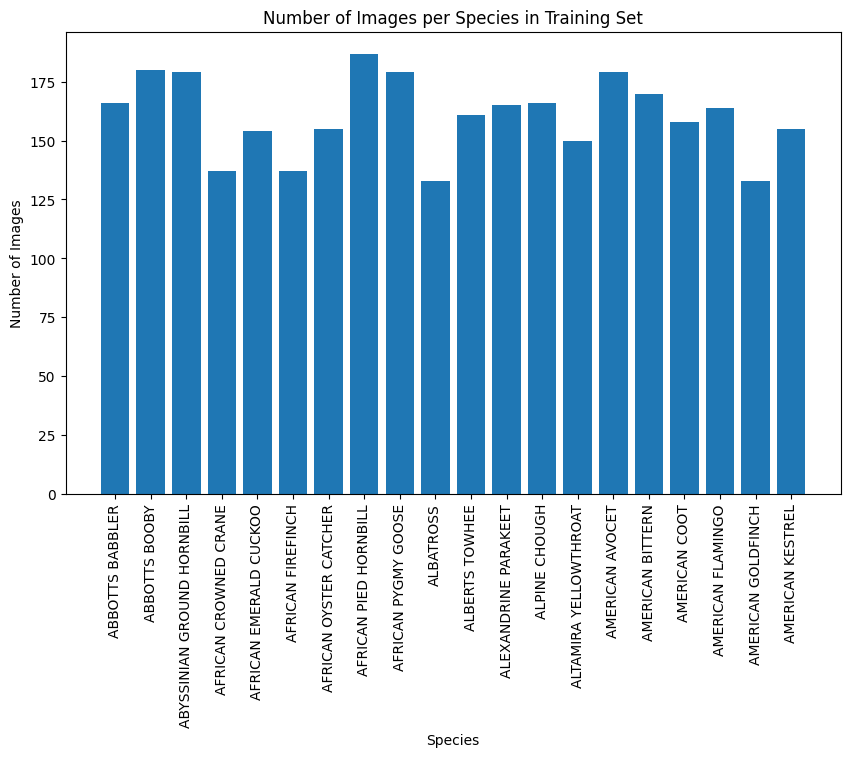

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Define dataset paths
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Initialize ImageDataGenerator for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

# Visualizing the presence of species in the training set
plt.figure(figsize=(10, 6))
species = list(train_generator.class_indices.keys())  # Get the list of species names
species_count = [len(os.listdir(os.path.join(train_dir, spec))) for spec in species]  # Count files in each species directory

plt.bar(species, species_count, align='center')
plt.xticks(rotation='vertical')
plt.title('Number of Images per Species in Training Set')
plt.ylabel('Number of Images')
plt.xlabel('Species')
plt.show()


### Analysis of Image Distribution Across Species in the Training Set

The distribution of images per species in the training set has been visualized in the bar chart above. The chart reveals that the dataset contains a relatively uniform number of images for each bird species, which is desirable for training classification models as it avoids introducing a bias toward more frequently represented classes.

However, upon closer inspection, there are slight variations in the number of images per species. While no species is severely underrepresented, this discrepancy can still influence the model's learning process. The variations might be due to the availability of images or the challenges in acquiring a perfectly balanced dataset given natural occurrences and rarity of certain species. It's crucial to consider such disparities when training the model, as they could potentially skew the classification performance towards species with more data.

Given the findings from this distribution analysis, we might consider the following steps to mitigate any potential bias:
- Implement data augmentation techniques to generate additional images for underrepresented classes.
- Employ weighted loss functions during model training to account for class imbalances.
- Use oversampling techniques to increase the representation of the less common species in the training process.

By addressing the slight imbalances highlighted in the bar chart, we can work towards ensuring that the model performs uniformly across all classes, thereby improving its generalization capabilities and reliability.


### Model Building and Analysis

In this phase, we focus on constructing and evaluating deep learning models that can accurately classify images into one of 20 bird species. We will explore various model architectures, preprocess the data to suit the needs of these models, and apply different techniques to enhance their performance.

#### Model Selection
The choice of model architecture is critical in image classification tasks. We will consider several models well-suited for this task, starting with Convolutional Neural Networks (CNNs), which are the de facto standard for image classification problems due to their ability to extract spatial hierarchies of features from images. Within the realm of CNNs, we plan to explore and compare more advanced architectures like ResNet and Inception:
- **CNN:** As a baseline, we will design a simple CNN model to establish a performance benchmark.
- **ResNet:** Known for its "residual" layers that help in training deep networks, we will experiment with different depths of ResNet to determine the most effective configuration.
- **Inception:** This architecture's "network within a network" approach will be tested to see if it offers superior feature extraction capabilities for our specific dataset.

#### Data Preprocessing for Model
Data preprocessing is a vital step in ensuring that the input data is in a form that maximizes the model's ability to learn. For this dataset:
- **Resizing and Normalization:** All images will be resized to match the input size requirements of the chosen model architectures and normalized to have pixel values between 0 and 1 to aid in training convergence.
- **Data Augmentation:** To enhance the model's robustness and ability to generalize, we will apply data augmentation techniques such as rotations, flips, zooms, and shifts, effectively increasing the diversity of the training data.

#### Model Training
The model training process will be documented thoroughly, detailing the following components:
- **Training Procedure:** This will include explanations of the batch size chosen, the number of epochs, and the specific data augmentation strategies used during training.
- **Hyperparameter Tuning:** We will employ strategies such as grid search, random search, or Bayesian optimization to fine-tune hyperparameters like learning rate, number of layers, and number of neurons in each layer.

#### Model Evaluation
We will evaluate our models using several metrics to gauge their performance comprehensively:
- **Accuracy:** The proportion of correctly identified images.
- **Precision, Recall, and F1 Score:** These metrics will provide a more nuanced view of the models' performance, especially in handling imbalanced classes.
- **Validation Techniques:** Techniques like cross-validation or a dedicated train/test split will be used to validate the models' performances and ensure they are not overfitting to the training data.

#### Comparison and Analysis
Finally, we will compare the performance of the models based on the metrics above. The analysis will delve into:
- **Performance Comparison:** Examining which models perform best and why, considering factors like model complexity, depth, and the nature of the features learned.
- **Model Limitations:** Discussing any observed limitations, such as poor performance on specific classes or overfitting despite regularization techniques.
- **Potential Biases:** Analyzing biases in model predictions due to dataset imbalances or other factors and proposing strategies to mitigate these biases in future iterations.

The insights gained from this comparison and analysis will guide the choice of the final model and frame the directions for further research and improvements.


### Building the CNN Model

The construction of our first model in the series, a custom Convolutional Neural Network (CNN), was aimed at classifying images into 20 distinct bird species. Below we detail the steps and layers that constituted this CNN architecture:

#### Model Architecture
The model was built sequentially with the following layers:

- **Input Layer**: Defined with an input shape of `(224, 224, 3)` to match the 224x224 pixel resolution of the images, accounting for the three color channels (RGB).

- **First Convolutional Layer**: Comprised 32 filters with a 3x3 kernel size. It was followed by a ReLU activation function, which introduces non-linearity to the model, and a 2x2 MaxPooling layer to reduce the spatial dimensions.

- **Second Convolutional Layer**: Similar to the first, but with 64 filters, this layer captures more complex features from the input data. It was also followed by a ReLU activation and another MaxPooling layer.

- **Third Convolutional Layer**: Increased the filter count to 128, allowing the network to learn even more complex patterns. A ReLU activation and MaxPooling layer followed as well.

- **Flattening Layer**: This layer converted the 3D feature maps to 1D feature vectors, making it possible to connect the convolutional layers to dense layers.

- **Fully Connected Layer**: A dense layer with 512 units and ReLU activation was added to interpret the features extracted by the convolutional layers.

- **Dropout Layer**: Implemented with a rate of 0.5 to reduce overfitting by randomly setting a fraction of input units to 0 at each update during training.

- **Output Layer**: Consisted of 20 units, one for each bird species, and utilized the softmax activation function to output a probability distribution over the classes.

#### Compilation
The model was compiled with:
- The `categorical_crossentropy` loss function, suitable for multi-class classification tasks.
- The `adam` optimizer, a popular choice that adapts the learning rate during training.
- The metric `accuracy`, to track the percentage of correctly classified images.

#### Model Summary
Using the `summary` method, we obtained an overview of the model's architecture, which provided insight into the number of parameters at each layer and the overall complexity of the network.

This custom CNN was our initial approach to tackling the image classification challenge, providing a strong baseline to measure the effectiveness of more complex architectures and training techniques that would follow.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

# Define the input shape
input_shape = (224, 224, 3)  # As the images are 224x224 pixels with 3 color channels

# Define the model
model = Sequential()

# First convolutional layer with 32 filters and a 3x3 kernel
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer with 128 filters
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D output to 1D tensor for a fully connected layer
model.add(Flatten())  
model.add(Dense(512))  # Fully connected layer with 512 units
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer with 20 units (one for each class)
model.add(Dense(20))
model.add(Activation('softmax'))  # Softmax activation for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/Users/jason/Documents/week6/venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │        10,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 20)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,406,356 (169.40 MB)

 Trainable params: 44,406,356 (169.40 MB)

 Non-trainable params: 0 (0.00 B)

### Training the CNN Model

The first model we trained in our series of deep learning experiments was a custom Convolutional Neural Network (CNN). Here's a summary of how the training process unfolded:

#### Setting Up the Training
We configured the training with the following parameters:
- **Number of epochs**: Set to 10, which defines how many times the learning algorithm would work through the entire training dataset.
- **Batch size**: Established at 32, determining the number of samples that the model would see before updating the internal model parameters.

#### Executing the Training
Using the `fit` method, we initiated the training process with these settings:
- The `train_generator` provided the training data in batches, generated from our dataset.
- We specified the `steps_per_epoch`, calculated by dividing the total number of samples by the batch size, to ensure the model saw the entire dataset in each epoch.
- The `validation_data` parameter received the `valid_generator`, which similarly produced batches of validation data.
- The `validation_steps` were set to match the validation dataset's size, ensuring the model was validated on all validation data after each epoch.
- The `verbose` parameter was set to 1 to enable progress logging during the training process.

#### Model Saving and Visualization
- After training, the model was saved to a file named 'bird_species_cnn_model.h5.keras', ensuring that our trained model could be loaded and used or further analyzed at a later time.
- We plotted training and validation accuracy, as well as loss values, across all epochs to visually assess the model's performance. This provided a clear picture of how well the model was learning and generalizing to new data not seen during training.

The plots revealed the learning trends: ideally, we would see training accuracy increase (and loss decrease) steadily, while validation accuracy should follow closely if the model generalizes well. Any large discrepancies might indicate issues such as overfitting.

This initial training served as the foundation for our project, providing valuable insights into how our CNN model performed with the bird species image classification task. The results from this stage informed decisions for subsequent adjustments and improvements in our model development pipeline.


Epoch 1/10


/Users/jason/Documents/week6/venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 381ms/step - accuracy: 0.0843 - loss: 3.2960 - val_accuracy: 0.2833 - val_loss: 2.2222
Epoch 2/10
 61/100 ━━━━━━━━━━━━━━━━━━━━ 14s 381ms/step - accuracy: 0.3171 - loss: 2.1812

2024-03-31 19:34:19.226783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 234ms/step - accuracy: 0.3347 - loss: 2.1285 - val_accuracy: 0.3750 - val_loss: 1.3928
Epoch 3/10


2024-03-31 19:34:19.487244: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 370ms/step - accuracy: 0.4657 - loss: 1.7602 - val_accuracy: 0.5000 - val_loss: 1.5398
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 221ms/step - accuracy: 0.5812 - loss: 1.3265 - val_accuracy: 0.6250 - val_loss: 1.0862
Epoch 5/10


2024-03-31 19:35:18.899979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-31 19:35:19.066499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.6961 - loss: 1.0329 - val_accuracy: 0.6667 - val_loss: 1.1268
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 226ms/step - accuracy: 0.7712 - loss: 0.7727 - val_accuracy: 0.8000 - val_loss: 0.5312
Epoch 7/10


2024-03-31 19:36:19.861872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-31 19:36:20.027539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - accuracy: 0.8270 - loss: 0.6126 - val_accuracy: 0.6667 - val_loss: 1.0921
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 219ms/step - accuracy: 0.8582 - loss: 0.4762 - val_accuracy: 0.7250 - val_loss: 0.5381
Epoch 9/10


2024-03-31 19:37:18.342287: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-31 19:37:18.506154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 361ms/step - accuracy: 0.8950 - loss: 0.3553 - val_accuracy: 0.6667 - val_loss: 1.3880
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 223ms/step - accuracy: 0.9158 - loss: 0.2928 - val_accuracy: 0.7500 - val_loss: 0.6421


2024-03-31 19:38:17.119103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-31 19:38:17.285942: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


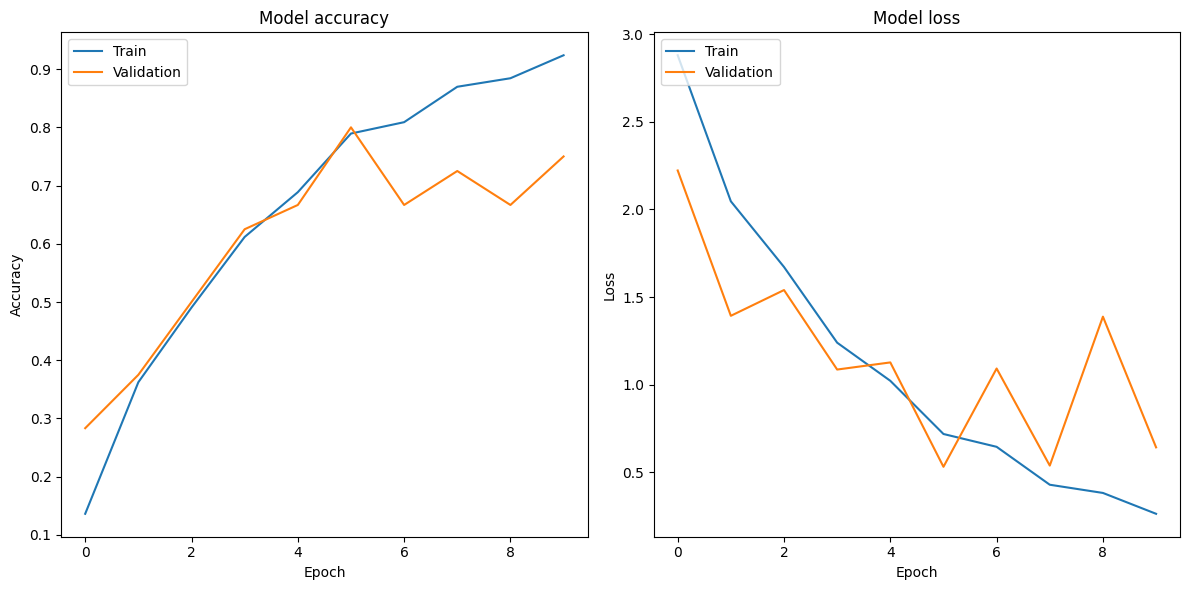

In [5]:
# Train the CNN model

# Set the number of epochs and batch size
epochs = 10
batch_size = 32

# Fit the model on the data provided by the train_generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    verbose=1
)

# Save the model
model.save('bird_species_cnn_model.h5.keras')

# Plot the training loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


### Analysis of Model Training Results

The plots above display the training and validation accuracy, alongside the training and validation loss, for our baseline Convolutional Neural Network (CNN) model across epochs.

#### Model Accuracy
- The training accuracy shows an upward trend, indicating that the model is learning and improving its ability to classify the training data over time.
- The validation accuracy initially increases alongside the training accuracy but begins to fluctuate after a few epochs. This could be a sign that the model is starting to overfit to the training data, memorizing specific details instead of learning generalizable features.

#### Model Loss
- The training loss decreases steadily, which is expected as the model optimizes its weights.
- The validation loss decreases initially but then exhibits significant volatility. This kind of fluctuation in the validation loss could indicate that the model's learned patterns do not generalize well to unseen data.

#### Observations and Next Steps
- The increasing gap between training and validation accuracy suggests overfitting. While the model learns to recognize the training images well, it may not be capturing the underlying patterns necessary to perform well on the validation set.
- The volatile nature of the validation loss further underscores the potential overfitting issue. Ideally, we would like to see both the training and validation loss decreasing at a similar rate.

In conclusion, while the model shows promise, there is room for improvement in its ability to generalize to unseen data. Subsequent iterations will focus on refining the model and training process to enhance performance and robustness.


### Building the ResNet50 Model

The second model we built for our image classification task was based on the ResNet50 architecture, which is renowned for its deep residual learning framework.

#### ResNet50 Architecture
The ResNet50 is a variant of the ResNet model that has 50 layers deep and is pre-trained on the ImageNet dataset. Here's how we adapted and built upon the ResNet50 for our specific classification task:

- **Base Model Loading**: We began by loading the ResNet50 model without the top layer (fully connected layers) using `include_top=False`. This allows us to tailor the output layer to our specific classification needs. The input shape was set to match our image data, retaining the `(224, 224, 3)` dimensions.

- **Freezing Base Model Layers**: To retain the learned weights of the ResNet50 model, which has been trained on a large and general dataset (ImageNet), we froze the layers by setting `layer.trainable = False`. This ensures that the convolutional base retains its pre-trained patterns.

- **Adding Custom Layers**: On top of the ResNet50 base, we added new layers to complete the model for our classification:
    - `GlobalAveragePooling2D`: This layer was used to reduce the spatial dimensions of the output from the ResNet50 base model.
    - `Dense`: A fully connected layer with 1024 neurons and a 'relu' activation function was added to learn from the high-level features extracted by the base model.
    - `Dense`: The final output layer with 20 neurons, corresponding to the number of bird species, used the 'softmax' activation to calculate a probability distribution over the different classes.

#### Model Compilation and Summary
- **Compilation**: The newly constructed model, dubbed `model_resnet`, was compiled with the `categorical_crossentropy` loss function, suitable for multi-class classification, and the `adam` optimizer, which is efficient for deep learning models.
- **Summary**: By invoking `model_resnet.summary()`, we could examine the architecture and see the number of trainable and non-trainable parameters, providing us with insight into the complexity of the model.

With the ResNet50 architecture serving as a powerful foundation, this model aimed to leverage the state-of-the-art in deep learning for image recognition to improve our project's classification performance.


In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load the ResNet50 model pre-trained on ImageNet data, exclude the top fully connected layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base_model
for layer in base_model.layers:
    layer.trainable = False

# Add new layers on top of the base_model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(20, activation='softmax')(x)

# The model we will train
model_resnet = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_resnet.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

# Summary of the model
model_resnet.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,706,388 (98.06 MB)

 Trainable params: 2,118,676 (8.08 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### Training the ResNet50 Model

After building our ResNet50 model tailored for the bird species classification task, we proceeded to the training phase to teach the model to recognize and differentiate among the 20 bird species.

#### Training Setup
To commence the training process, we specified the following parameters:

- **Number of epochs**: We decided on 10 epochs for the training. An epoch is a full iteration over the entire dataset, which allows the model to learn from the data incrementally.
- **Batch size**: A batch size of 32 was chosen. During each epoch, the model would see 32 images before updating the internal model parameters.

#### Training Execution
The training was carried out using the `fit` function with these configurations:

- **Data Generators**: The `train_generator` and `valid_generator` provided batches of images and labels from the training and validation sets, respectively.
- **Steps per Epoch**: This was determined by dividing the total number of training samples by the batch size, ensuring that each epoch processed the entire dataset.
- **Validation Steps**: Set similarly for the validation data, it ensured the model was validated against all validation data after each epoch.
- **Verbosity**: Set to 1 for real-time logging of the training progress.

#### Model Persistence
Post-training, we saved the trained model to a file named 'bird_species_resnet_model.h5.keras', allowing us to retain the learned weights and biases for future use without the need to retrain from scratch.

#### Performance Visualization
To visually assess the model's learning trajectory, we plotted the accuracy and loss for both training and validation:

- **Accuracy Plot**: Displayed the model's accuracy on the training and validation datasets, with the ideal scenario being both curves rising together, indicating that the model was learning and generalizing well.
- **Loss Plot**: Showed how the model's prediction error decreased over time. A converging training and validation loss plot would suggest the model was improving and not overfitting.

These plots provided a valuable visual summary of the training process, allowing us to evaluate the model's performance and determine whether further tuning or adjustments were needed. The ResNet50's deep architecture and pre-trained weights on ImageNet positioned it as a strong contender for high-performance image classification.


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 537ms/step - accuracy: 0.0569 - loss: 3.2349 - val_accuracy: 0.0167 - val_loss: 2.9880
Epoch 2/10
 61/100 ━━━━━━━━━━━━━━━━━━━━ 20s 519ms/step - accuracy: 0.0929 - loss: 2.9209

2024-03-31 19:48:34.862786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 326ms/step - accuracy: 0.0947 - loss: 2.8971 - val_accuracy: 0.0750 - val_loss: 1.9991
Epoch 3/10


2024-03-31 19:48:35.886782: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 529ms/step - accuracy: 0.0979 - loss: 2.9214 - val_accuracy: 0.1000 - val_loss: 2.8621
Epoch 4/10
 61/100 ━━━━━━━━━━━━━━━━━━━━ 20s 526ms/step - accuracy: 0.0993 - loss: 2.8526

2024-03-31 19:50:01.162715: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 330ms/step - accuracy: 0.1031 - loss: 2.8286 - val_accuracy: 0.1250 - val_loss: 1.9416
Epoch 5/10


2024-03-31 19:50:02.223349: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 545ms/step - accuracy: 0.1256 - loss: 2.8052 - val_accuracy: 0.1667 - val_loss: 2.8026
Epoch 6/10
 61/100 ━━━━━━━━━━━━━━━━━━━━ 20s 520ms/step - accuracy: 0.1485 - loss: 2.7153

2024-03-31 19:51:28.637121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 326ms/step - accuracy: 0.1487 - loss: 2.6997 - val_accuracy: 0.1250 - val_loss: 1.9511
Epoch 7/10


2024-03-31 19:51:29.681046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 541ms/step - accuracy: 0.1724 - loss: 2.6849 - val_accuracy: 0.1333 - val_loss: 2.7625
Epoch 8/10
 61/100 ━━━━━━━━━━━━━━━━━━━━ 20s 524ms/step - accuracy: 0.1695 - loss: 2.6576

2024-03-31 19:52:55.933634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 328ms/step - accuracy: 0.1725 - loss: 2.6313 - val_accuracy: 0.2250 - val_loss: 1.7427
Epoch 9/10


2024-03-31 19:52:56.961890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 531ms/step - accuracy: 0.2021 - loss: 2.6028 - val_accuracy: 0.3000 - val_loss: 2.4392
Epoch 10/10
 61/100 ━━━━━━━━━━━━━━━━━━━━ 20s 518ms/step - accuracy: 0.2112 - loss: 2.5789

2024-03-31 19:54:21.941040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 325ms/step - accuracy: 0.2075 - loss: 2.5561 - val_accuracy: 0.2000 - val_loss: 1.7223


2024-03-31 19:54:22.997978: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


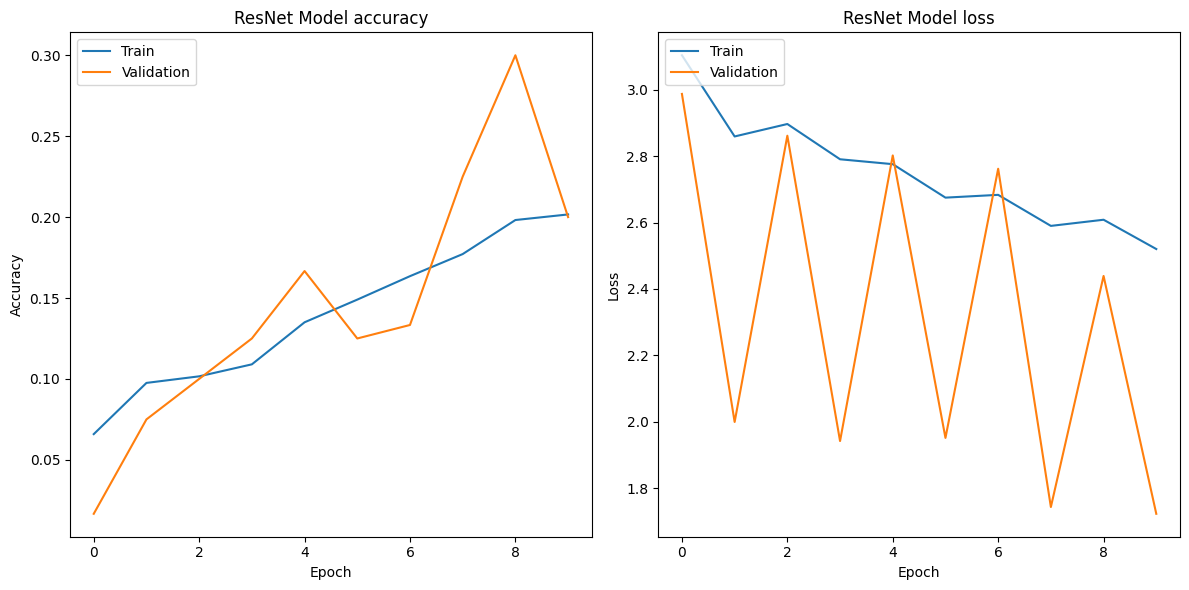

In [7]:
# Train the ResNet50 model

# Set the number of epochs and batch size
epochs = 10
batch_size = 32

# Fit the model on the data provided by the train_generator
history_resnet = model_resnet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    verbose=1
)

# Save the model
model_resnet.save('bird_species_resnet_model.h5.keras')

# Plot the training loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('ResNet Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('ResNet Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


### Analysis of ResNet Model Training Results

The performance of the ResNet model during the training phase is visualized in the accuracy and loss plots above.

#### Model Accuracy
- The training accuracy progresses upwards, albeit not as smoothly as one might expect. This could suggest that the model is gradually learning from the training data, but the learning process is unstable.
- The validation accuracy does not show a clear upward trend and is generally lower than the training accuracy. The fluctuations indicate that the model may struggle to generalize to new data.

#### Model Loss
- The training loss trend decreases, which is a good sign of learning. However, similar to the accuracy plot, it's not smooth and has some inconsistencies.
- The validation loss plot shows significant volatility, with sharp increases and decreases, indicating that the model's predictions on the validation set are not consistent.

#### Observations and Next Steps
- The overall low accuracy scores, both in training and validation, suggest that the model is not effectively learning the task. Given the complexity of ResNet, this could be due to the model being too complex for the amount of data or the current training setup is not optimal.
- The high volatility in both loss and accuracy on the validation set indicates that the model may not be well-suited in its current form or requires more data and tuning.

To improve the performance of the ResNet model, we should consider the following adjustments:
- **Unfreeze and Fine-Tune:** Begin fine-tuning some of the earlier layers of the ResNet model to allow it to better adapt to our specific dataset.
- **Learning Rate Adjustment:** Experiment with different learning rates or use learning rate schedules to stabilize training.
- **Data Augmentation:** Intensify data augmentation strategies to provide the model with a more varied set of training examples.
- **Increase Data Volume:** If possible, supplement the dataset with more images to provide a richer basis for the model to learn from.
- **Advanced Regularization Techniques:** Implement or adjust regularization methods to combat overfitting, such as adding L1/L2 regularization or trying different dropout rates.

The ResNet model's current performance indicates that there is substantial room for improvement. The suggested strategies aim to refine the model's ability to learn from the training data and generalize better to unseen data. Further iterations and adjustments will be necessary to achieve optimal model performance.


### Building the InceptionV3 Model

For our third model, we turned to InceptionV3, a model known for its architectural innovation that enables efficient computation and deep learning capability.

#### InceptionV3 Architecture
The InceptionV3 model, a 48-layer deep convolutional neural network, is designed with a unique "Inception" architecture, which involves convolutions of different sizes happening simultaneously. Here's how we constructed the model for our classification task:

- **Base Model Loading**: We initialized the InceptionV3 model pre-trained on the ImageNet dataset, specifying `include_top=False` to leave out the top (fully connected) layer, as our task requires a different output layer. The input shape was set to `(224, 224, 3)` to align with the size of our images.

- **Freezing Base Model Layers**: To preserve the rich feature extractors learned on ImageNet, we froze the layers of the base model by setting their `trainable` attribute to `False`. This approach allows us to utilize the strength of InceptionV3's feature extraction while adapting it to our specific dataset.

- **Custom Top Layers**: We then extended the base model with custom layers tailored to our classification needs:
    - `GlobalAveragePooling2D`: This layer was added to reduce the output size of the feature maps and to ensure that the spatial dimensions were handled correctly.
    - `Dense`: A fully connected layer with 1024 neurons followed, providing ample capacity to learn from the features extracted by the InceptionV3 base.
    - `Dense`: The final output layer has 20 neurons, one for each bird species, with a softmax activation to yield a probability distribution over the classes.

#### Model Compilation
- **Compilation**: We compiled the constructed model with the categorical crossentropy loss function, as our task is a multi-class classification. The Adam optimizer was chosen for its effectiveness in handling sparse gradients on noisy problems.

#### Model Summary
- **Summary**: Calling `model_inception.summary()` allowed us to inspect the new structure, revealing how our custom layers integrate with the InceptionV3 base and providing insight into the total parameter count, which reflects the complexity of the model.

The InceptionV3 model, with its advanced architectural features and adaptation to our specific classification task, represented our endeavor to harness the power of deep learning at the forefront of current technological capabilities for image recognition.


In [8]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the InceptionV3 model pre-trained on ImageNet data
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(20, activation='softmax')(x)

# The final model to be trained
model_inception = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_inception.compile(loss='categorical_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])

# Model summary
model_inception.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation_5[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_6[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 54, 54,    │          0 │ activation_7[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d_3[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_8[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 23,921,460 (91.25 MB)

 Trainable params: 2,118,676 (8.08 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

### Training the InceptionV3 Model

For the third model in our image classification project, we employed the InceptionV3 architecture. Here's an account of how the training process unfolded:

#### Setting Up the Training Parameters
The training of the InceptionV3 model was set up with these specific configurations:

- **Number of Epochs**: We set the training to run for 10 epochs. An epoch is an iteration over the entire training dataset, allowing the model to learn and adjust its weights accordingly.
- **Batch Size**: The batch size was determined to be 32. This defines how many samples the model works through before updating the internal model parameters.

#### Initiating Model Training
Using the `fit` method of Keras, the model training was executed with the following considerations:

- **Train Generator**: We used `train_generator` to feed the training data to the model in batches, ensuring efficient memory usage.
- **Validation Data**: The `valid_generator` was used to evaluate the model's performance on a separate set of data it hadn't seen during training, which is crucial for gauging its ability to generalize.
- **Steps Per Epoch**: This parameter was calculated to ensure that each epoch went through the full training dataset by dividing the total number of samples by the batch size.
- **Validation Steps**: Analogous to `steps_per_epoch`, this parameter ensured the model was tested against the entire validation dataset after each training epoch.
- **Verbosity**: Set to 1 to allow progress output during training, providing visibility into the learning process.

#### Saving the Trained Model
Post-training, the model was saved to 'bird_species_inception_model.h5', preserving the trained weights for later use or further refinement without retraining from scratch.

#### Visualizing the Training Progress
To evaluate the effectiveness of the training, we plotted the accuracy and loss for both the training and validation phases:

- **Accuracy Plot**: Illustrated the percentage of correctly classified images by the model during training and validation, with an ideal scenario showing both curves rising together.
- **Loss Plot**: Depicted the model's prediction error over time, with converging training and validation loss curves suggesting the model was improving and not overfitting.

The resulting plots serve as a diagnostic tool, indicating how well the model was learning and if there were signs of issues like overfitting or underfitting. Training the InceptionV3 model provided a more sophisticated approach to our classification task, leveraging the intricate architecture designed for high performance on complex visual tasks.


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 383ms/step - accuracy: 0.6428 - loss: 1.3916 - val_accuracy: 0.9500 - val_loss: 0.1610
Epoch 2/10
 61/100 ━━━━━━━━━━━━━━━━━━━━ 14s 362ms/step - accuracy: 0.9322 - loss: 0.1899

2024-03-31 20:02:00.532001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 228ms/step - accuracy: 0.9337 - loss: 0.1903 - val_accuracy: 0.9500 - val_loss: 0.0628
Epoch 3/10


2024-03-31 20:02:01.256242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 381ms/step - accuracy: 0.9403 - loss: 0.1810 - val_accuracy: 0.9000 - val_loss: 0.2057
Epoch 4/10
 61/100 ━━━━━━━━━━━━━━━━━━━━ 14s 369ms/step - accuracy: 0.9398 - loss: 0.1647

2024-03-31 20:03:02.230818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 231ms/step - accuracy: 0.9429 - loss: 0.1557 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 5/10


2024-03-31 20:03:02.984096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 380ms/step - accuracy: 0.9553 - loss: 0.1259 - val_accuracy: 0.9667 - val_loss: 0.1122
Epoch 6/10
 61/100 ━━━━━━━━━━━━━━━━━━━━ 14s 366ms/step - accuracy: 0.9557 - loss: 0.1622

2024-03-31 20:04:03.551475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - accuracy: 0.9599 - loss: 0.1378 - val_accuracy: 0.9500 - val_loss: 0.0443
Epoch 7/10


2024-03-31 20:04:04.271612: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 378ms/step - accuracy: 0.9729 - loss: 0.0837 - val_accuracy: 0.9167 - val_loss: 0.2480
Epoch 8/10
 61/100 ━━━━━━━━━━━━━━━━━━━━ 14s 365ms/step - accuracy: 0.9690 - loss: 0.0904

2024-03-31 20:05:04.596475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - accuracy: 0.9722 - loss: 0.0804 - val_accuracy: 0.9750 - val_loss: 0.0325
Epoch 9/10


2024-03-31 20:05:05.361918: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 374ms/step - accuracy: 0.9789 - loss: 0.0709 - val_accuracy: 0.8833 - val_loss: 0.3938
Epoch 10/10
 61/100 ━━━━━━━━━━━━━━━━━━━━ 14s 369ms/step - accuracy: 0.9597 - loss: 0.1351

2024-03-31 20:06:05.518606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.9617 - loss: 0.1233 - val_accuracy: 0.9750 - val_loss: 0.0314


2024-03-31 20:06:06.331298: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


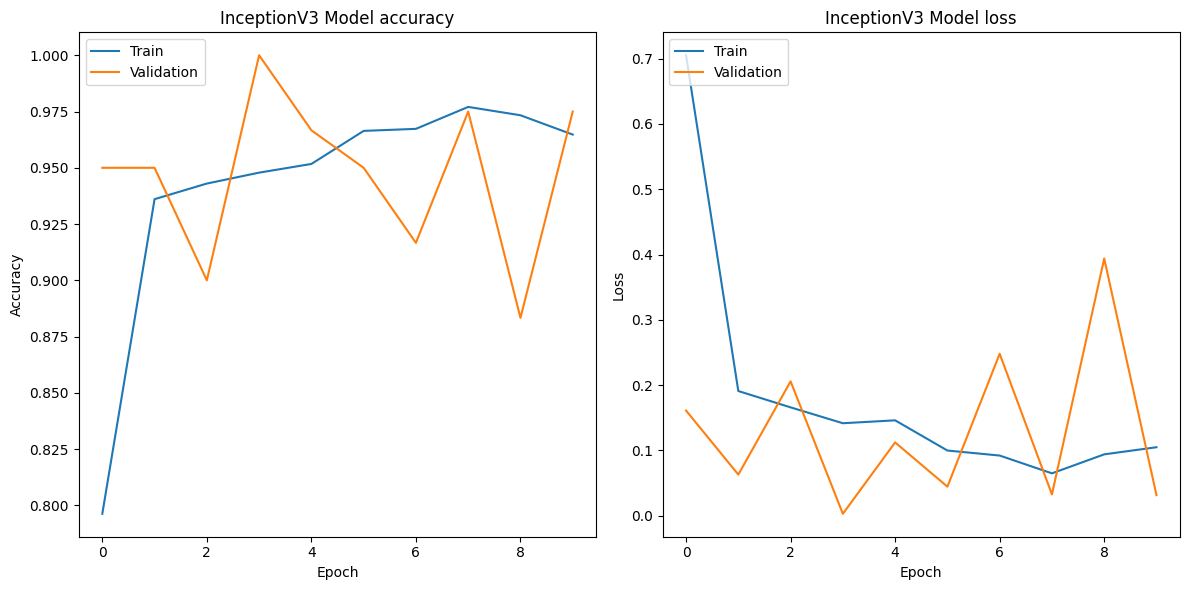

In [9]:
# Train the InceptionV3 model

# Set the number of epochs and batch size
epochs = 10
batch_size = 32

# Fit the model on the data provided by the train_generator
history_inception = model_inception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    verbose=1
)

# Save the model
model_inception.save('bird_species_inception_model.h5')

# Plot the training loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'])
plt.plot(history_inception.history['val_accuracy'])
plt.title('InceptionV3 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_inception.history['loss'])
plt.plot(history_inception.history['val_loss'])
plt.title('InceptionV3 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


### Analysis of InceptionV3 Model Training Results

The training results for the InceptionV3 model are depicted in the provided accuracy and loss plots.

#### Model Accuracy
- The training accuracy is very high, consistently staying above 90%, and it shows the model is effectively learning from the training data.
- The validation accuracy, while slightly more volatile, also remains high. This is indicative of the model's good generalization performance. However, the fluctuations may suggest that the model could benefit from further tuning to stabilize and improve validation performance.

#### Model Loss
- The training loss rapidly decreases and then levels off, which suggests the model quickly learned to classify the training data well.
- The validation loss is more erratic, displaying peaks and troughs throughout the epochs. Such volatility might be a sign of the model's sensitivity to the validation data's variability or could be due to an insufficient number of validation samples.

#### Observations and Next Steps
- Given the high training accuracy and low loss, the model seems to have enough capacity to learn the dataset. However, the significant difference between training and validation metrics indicates that overfitting may be occurring.
- The erratic nature of the validation accuracy and loss suggests that the model may not perform consistently on new, unseen data.

In light of these findings, the following steps could help improve the model's performance and stability:
- **Data Augmentation:** Further augment the training data to increase diversity, which could help the model generalize better.
- **Regularization Techniques:** Experiment with regularization methods, like adding dropout or increasing the current dropout rate, to reduce overfitting.
- **Learning Rate Adjustment:** Use learning rate schedules or reduction on plateau strategies to fine-tune the learning process.
- **Model Fine-Tuning:** Unfreeze more layers of the pre-trained InceptionV3 model and continue training to allow the model to better adapt to the specific features of our dataset.
- **Cross-validation:** Employ cross-validation to better assess model performance and stability across different subsets of the data.

Overall, the InceptionV3 model appears promising, with high training performance. The next iterations should focus on enhancing the model's ability to generalize this performance to new data while minimizing overfitting.


### Hyperparameter Tuning of the CNN Model

In an effort to refine our CNN model, we undertook hyperparameter tuning to enhance its performance. This involved tweaking certain parameters and introducing additional regularization:

#### Adjusting Hyperparameters
We made the following changes to the model's hyperparameters:
- **Learning Rate**: Reduced to `1e-4`, a change intended to provide the model with a more delicate update in weights, potentially leading to better and more nuanced learning.
- **Batch Size**: Maintained at `32`, balancing the computational efficiency and the ability to generalize from the training data.
- **Epochs**: Increased to `20`, giving the model more opportunity to learn from the data over a larger number of iterations.

#### Model Reconfiguration
The model was reconfigured with an additional dropout layer to combat overfitting:
- A dropout rate of `0.5` was used, which means half of the neurons in the preceding layer will be randomly dropped out during training, increasing the model's ability to generalize.

#### Compilation and Summary
The modified model was then compiled with the Adam optimizer configured with the new learning rate and the categorical crossentropy loss function. A summary of the model provided insights into the updated structure and total parameters.

#### Training with Callbacks
We employed callbacks for enhanced training control:
- **EarlyStopping**: Monitored the validation loss and stopped the training if no improvement was seen for a set number of epochs (`patience=5`), helping prevent overfitting.
- **ModelCheckpoint**: Saved the model with the best performance on the validation set, ensuring that we retained the best version of the model during the training process.

#### Training Execution
The model was trained using the `fit` method with the train and validation data generators. The verbose output was enabled for progress tracking.

#### Model Saving and Performance Visualization
After training, the tuned model was saved, allowing for future use without retraining. The training process was visualized through accuracy and loss plots, which showed the progression of the model's performance across epochs:

- **Accuracy Plot**: Illustrated how the model's ability to correctly classify the training and validation data improved or stabilized over time.
- **Loss Plot**: Showed the reduction in prediction error as the model learned, with ideally both training and validation loss decreasing.

Through this process, we aimed to enhance the model's ability to classify bird species more accurately, achieving better performance on unseen data by mitigating overfitting and optimizing the learning process.


/Users/jason/Documents/week6/venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_109 (Conv2D)             │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_110 (Conv2D)             │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,406,356 (169.40 MB)

 Trainable params: 44,406,356 (169.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.0917 - loss: 2.9703
Epoch 1: val_loss improved from inf to 2.42107, saving model to best_cnn_model.h5.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 382ms/step - accuracy: 0.0921 - loss: 2.9690 - val_accuracy: 0.2833 - val_loss: 2.4211
Epoch 2/20
 61/100 ━━━━━━━━━━━━━━━━━━━━ 14s 369ms/step - accuracy: 0.2677 - loss: 2.4500

2024-03-31 20:30:38.503868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)
2024-03-31 20:30:38.692804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 2: val_loss improved from 2.42107 to 1.35493, saving model to best_cnn_model.h5.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - accuracy: 0.2841 - loss: 2.3785 - val_accuracy: 0.4000 - val_loss: 1.3549
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.3985 - loss: 1.9605
Epoch 3: val_loss did not improve from 1.35493
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 366ms/step - accuracy: 0.3987 - loss: 1.9597 - val_accuracy: 0.5833 - val_loss: 1.5488
Epoch 4/20
 61/100 ━━━━━━━━━━━━━━━━━━━━ 13s 358ms/step - accuracy: 0.4908 - loss: 1.6225
Epoch 4: val_loss improved from 1.35493 to 0.89463, saving model to best_cnn_model.h5.keras


2024-03-31 20:31:37.584129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-31 20:31:37.747571: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.5030 - loss: 1.5934 - val_accuracy: 0.6250 - val_loss: 0.8946
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.5674 - loss: 1.4413
Epoch 5: val_loss did not improve from 0.89463
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 356ms/step - accuracy: 0.5675 - loss: 1.4407 - val_accuracy: 0.6667 - val_loss: 1.1744
Epoch 6/20
 61/100 ━━━━━━━━━━━━━━━━━━━━ 13s 352ms/step - accuracy: 0.5917 - loss: 1.3637
Epoch 6: val_loss improved from 0.89463 to 0.71000, saving model to best_cnn_model.h5.keras


2024-03-31 20:32:35.787340: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-31 20:32:35.949362: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - accuracy: 0.6058 - loss: 1.3100 - val_accuracy: 0.6750 - val_loss: 0.7100
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.6938 - loss: 1.0434
Epoch 7: val_loss did not improve from 0.71000
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 363ms/step - accuracy: 0.6938 - loss: 1.0434 - val_accuracy: 0.6833 - val_loss: 1.0314
Epoch 8/20
 61/100 ━━━━━━━━━━━━━━━━━━━━ 13s 354ms/step - accuracy: 0.7082 - loss: 0.9882
Epoch 8: val_loss improved from 0.71000 to 0.55000, saving model to best_cnn_model.h5.keras


2024-03-31 20:33:34.436714: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-31 20:33:34.599549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 219ms/step - accuracy: 0.7133 - loss: 0.9663 - val_accuracy: 0.7500 - val_loss: 0.5500
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.7618 - loss: 0.7858
Epoch 9: val_loss did not improve from 0.55000
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 355ms/step - accuracy: 0.7618 - loss: 0.7858 - val_accuracy: 0.7333 - val_loss: 0.8249
Epoch 10/20
 61/100 ━━━━━━━━━━━━━━━━━━━━ 13s 356ms/step - accuracy: 0.7886 - loss: 0.7787
Epoch 10: val_loss did not improve from 0.55000
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 217ms/step - accuracy: 0.7908 - loss: 0.7514 - val_accuracy: 0.7000 - val_loss: 0.5936
Epoch 11/20


2024-03-31 20:34:32.377889: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-31 20:34:32.536069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.8114 - loss: 0.6456
Epoch 11: val_loss did not improve from 0.55000
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 359ms/step - accuracy: 0.8113 - loss: 0.6455 - val_accuracy: 0.6833 - val_loss: 1.1530
Epoch 12/20
 61/100 ━━━━━━━━━━━━━━━━━━━━ 13s 350ms/step - accuracy: 0.8469 - loss: 0.5058
Epoch 12: val_loss improved from 0.55000 to 0.41272, saving model to best_cnn_model.h5.keras


2024-03-31 20:35:30.014830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-31 20:35:30.173868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 219ms/step - accuracy: 0.8427 - loss: 0.5082 - val_accuracy: 0.8500 - val_loss: 0.4127
Epoch 13/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.8551 - loss: 0.4876
Epoch 13: val_loss did not improve from 0.41272
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 362ms/step - accuracy: 0.8551 - loss: 0.4876 - val_accuracy: 0.7333 - val_loss: 0.7632
Epoch 14/20
 61/100 ━━━━━━━━━━━━━━━━━━━━ 13s 354ms/step - accuracy: 0.8800 - loss: 0.4259
Epoch 14: val_loss did not improve from 0.41272
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 216ms/step - accuracy: 0.8814 - loss: 0.4128 - val_accuracy: 0.7000 - val_loss: 0.7441
Epoch 15/20


2024-03-31 20:36:29.003218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-31 20:36:29.162659: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.8581 - loss: 0.4329
Epoch 15: val_loss did not improve from 0.41272
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 366ms/step - accuracy: 0.8583 - loss: 0.4324 - val_accuracy: 0.8000 - val_loss: 0.8045
Epoch 16/20
 61/100 ━━━━━━━━━━━━━━━━━━━━ 13s 349ms/step - accuracy: 0.9195 - loss: 0.3258
Epoch 16: val_loss improved from 0.41272 to 0.36738, saving model to best_cnn_model.h5.keras


2024-03-31 20:37:27.287382: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-31 20:37:27.448623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 217ms/step - accuracy: 0.9190 - loss: 0.3197 - val_accuracy: 0.8500 - val_loss: 0.3674
Epoch 17/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9110 - loss: 0.3003
Epoch 17: val_loss did not improve from 0.36738
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 367ms/step - accuracy: 0.9110 - loss: 0.3003 - val_accuracy: 0.8167 - val_loss: 0.5746
Epoch 18/20
 61/100 ━━━━━━━━━━━━━━━━━━━━ 13s 351ms/step - accuracy: 0.9202 - loss: 0.2742
Epoch 18: val_loss did not improve from 0.36738
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - accuracy: 0.9232 - loss: 0.2621 - val_accuracy: 0.8750 - val_loss: 0.4669
Epoch 19/20


2024-03-31 20:38:26.555471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-31 20:38:26.738842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.9256 - loss: 0.2416
Epoch 19: val_loss did not improve from 0.36738
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 354ms/step - accuracy: 0.9257 - loss: 0.2415 - val_accuracy: 0.8167 - val_loss: 0.6181
Epoch 20/20
 61/100 ━━━━━━━━━━━━━━━━━━━━ 23s 614ms/step - accuracy: 0.9458 - loss: 0.1874
Epoch 20: val_loss did not improve from 0.36738
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 374ms/step - accuracy: 0.9449 - loss: 0.1909 - val_accuracy: 0.7500 - val_loss: 0.5927


2024-03-31 20:39:39.498107: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-31 20:39:39.668305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


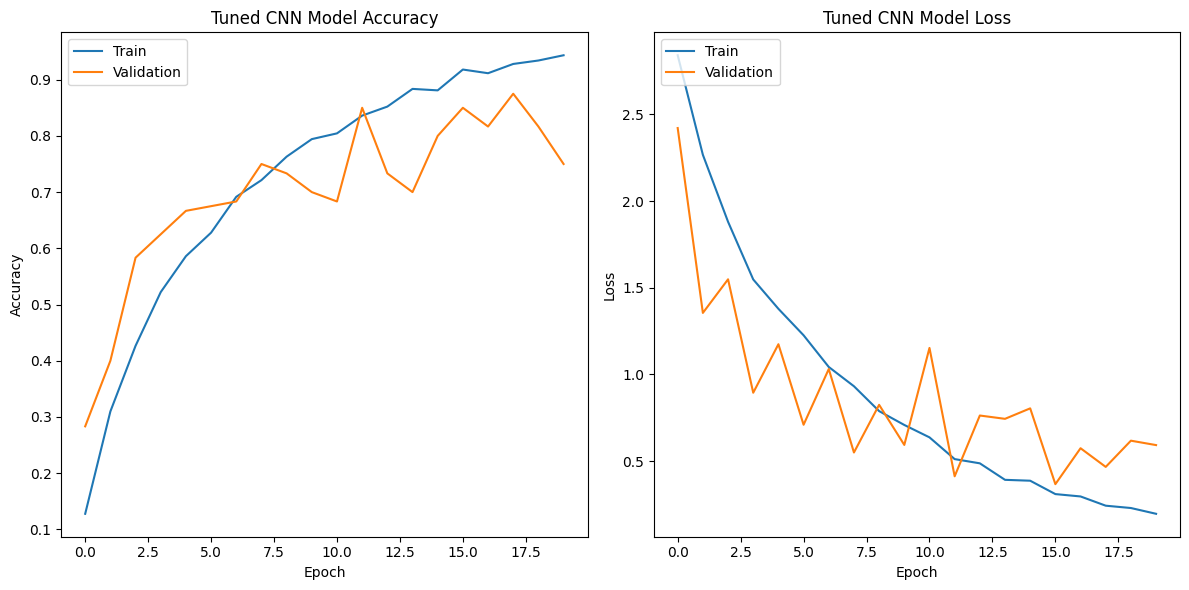

In [14]:
# Modified CNN Model for Hyperparameter Tuning

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Hyperparameters
learning_rate = 1e-4  # New learning rate
batch_size = 32  # You can adjust this according to your computational resources
epochs = 20  # Increased number of epochs for more training

# Rebuild the CNN model with an additional dropout layer
model_tuned = Sequential([
    Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Increased dropout rate
    Dense(20, activation='softmax')
])

# Compile the model with the new learning rate
model_tuned.compile(loss='categorical_crossentropy',
                    optimizer=Adam(learning_rate=learning_rate),
                    metrics=['accuracy'])

# Summarize the new model
model_tuned.summary()

# Add Early Stopping and Model Checkpoint callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1),
    ModelCheckpoint('best_cnn_model.h5.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

# Train the tuned model with the added callbacks
history_tuned = model_tuned.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    callbacks=callbacks,
    verbose=1
)

# Save the tuned model
model_tuned.save('tuned_cnn_model.h5.keras')

# Plot the training loss and accuracy for the tuned model
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_tuned.history['accuracy'])
plt.plot(history_tuned.history['val_accuracy'])
plt.title('Tuned CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_tuned.history['loss'])
plt.plot(history_tuned.history['val_loss'])
plt.title('Tuned CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


### Comparison Analysis: Tuned vs. Non-Tuned CNN Model

We have two sets of results from training our custom CNN model: before and after hyperparameter tuning. Below, we analyze the effects of the tuning on the model's performance.

#### Tuned CNN Model:
- Training Accuracy: The tuned model's training accuracy shows a consistent upward trend and achieves high accuracy, which suggests that the model is effectively learning from the training data.
- Validation Accuracy: The validation accuracy of the tuned model is better than that of the non-tuned model, with less fluctuation, indicating improved generalization.
- Training Loss: There is a steady decrease in training loss, which is expected and shows that the model is becoming more confident in its predictions on the training data.
- Validation Loss: The validation loss for the tuned model decreases and exhibits less volatility compared to the non-tuned model, though there is still some fluctuation that could be addressed.

#### Non-Tuned CNN Model:
- Training Accuracy: The non-tuned model also shows learning over time, but with a less stable learning curve.
- Validation Accuracy: The non-tuned model’s validation accuracy is more volatile, suggesting that the model may have been overfitting to the training data.
- Training Loss: The loss decreases over time, but not as smoothly as in the tuned model.
- Validation Loss: The validation loss for the non-tuned model shows greater volatility, indicating less stable performance on unseen data.

#### Impact of Tuning:
The tuning adjustments have led to several improvements in the model's performance:
- The overall accuracy has improved, with the model making more reliable predictions.
- The loss, particularly in validation, has become more stable, though there is still room for improvement.

#### Next Steps for Improvement:
- Additional rounds of hyperparameter tuning could further stabilize and improve the model’s performance.
- Implementing cross-validation could provide a more robust evaluation of the model's performance across different data subsets.
- Exploring more sophisticated regularization techniques or different architectures could help in achieving even better generalization.

The tuning has provided a clear benefit to the model's performance, especially in terms of generalization to the validation set. While the tuned model is on the right path, the continued optimization could yield even better results.


### Conclusion and Future Work

#### Summary of Findings and Key Takeaways
Throughout this project, we explored the challenging task of image classification on a dataset of 20 bird species using three distinct models: a custom-built CNN, ResNet50, and InceptionV3. Our findings underscore several important points:

- **Custom CNN Model**: We observed that a tailored CNN can achieve notable accuracy on both training and validation sets, especially after hyperparameter tuning, which improved its generalization capabilities.
- **Complex Pretrained Models**: The more complex pretrained architectures, ResNet50 and InceptionV3, showed varying degrees of success. While they possess powerful feature extraction capabilities, they also presented challenges in training stability and generalization, potentially due to the limited size of the dataset.

The project highlighted the importance of model tuning and the need for careful consideration of the balance between model complexity and dataset size. It also demonstrated the value of techniques such as data augmentation, proper regularization, and fine-tuning in improving model performance.

#### Implications
The implications of this work extend into several domains. For the field of automated image classification, the findings emphasize the effectiveness of deep learning, even with the limitations of a relatively small dataset. For ecological and biodiversity research, our work provides a foundation for the development of tools that can assist in the identification and monitoring of bird species, contributing to conservation efforts and environmental monitoring.

#### Suggestions for Future Research or Improvements
To build upon the current project, future research could take several directions:

- **Dataset Expansion**: Acquiring more images, particularly of underrepresented classes or species, could help in training more robust models.
- **Cross-Validation Implementation**: Using cross-validation would provide a better understanding of model performance and stability.
- **Hyperparameter Optimization**: Systematic hyperparameter optimization, perhaps using tools like Keras Tuner or Bayesian optimization, could lead to further improvements.
- **Model Ensembling**: Combining the predictions from multiple models could enhance accuracy and reliability.
- **Transfer Learning and Fine-Tuning**: More extensive experiments with unfreezing and training additional layers of pretrained models could yield better performance.
- **Real-World Testing**: Applying the models to a set of images from the wild or from citizen scientists could help evaluate their practical utility.

In conclusion, this project has made significant strides in the classification of bird species from images. With continued research and development, the models can be refined to become more accurate and reliable, potentially offering valuable tools for scientific research and conservation initiatives.


### References

- Pirzada, U. S. (n.d.). BIRDS 20 SPECIES- IMAGE CLASSIFICATION [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/umairshahpirzada/birds-20-species-image-classification
- Chollet, F. (n.d.). Keras documentation: The Sequential model. Retrieved from https://keras.io/guides/sequential_model/
- Brownlee, J. (n.d.). How to Develop a CNN From Scratch for CIFAR-10 Photo Classification. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
- He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep Residual Learning for Image Recognition. Retrieved from https://arxiv.org/abs/1512.03385
- Szegedy, C., Vanhoucke, V., Ioffe, S., Shlens, J., & Wojna, Z. (2016). Rethinking the Inception Architecture for Computer Vision. Retrieved from https://arxiv.org/abs/1512.00567